In [168]:
import keras
from keras.layers import *
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import numpy as np
import keras.utils

In [169]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [170]:
input_shape = (28, 28, 1)

In [171]:
x_train = x_train / 255
x_test = x_test / 255

In [172]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [173]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(100, activation = 'relu'),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [174]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [175]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=50, epochs=10)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8533 - loss: 0.4999
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9632 - loss: 0.1249
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9744 - loss: 0.0843
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9811 - loss: 0.0606
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9840 - loss: 0.0491
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9880 - loss: 0.0376
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9894 - loss: 0.0331
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9921 - loss: 0.0247
Epoch 9/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9940 - loss: 0.0193
Epoch 10/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9945 - loss: 0.0172
CPU times: total: 1min 18s
Wall time: 41.4 s


In [176]:
from PIL import Image

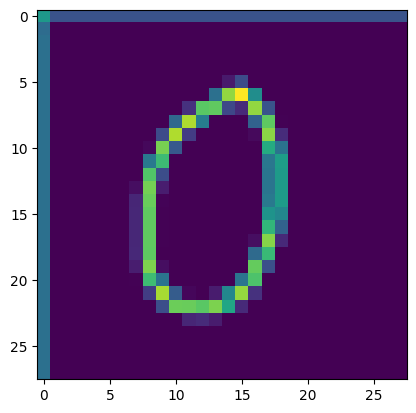

In [234]:
im3 = Image.open('./3.png').resize((28, 28)).convert("L")
im5 = Image.open('./5.png').resize((28, 28)).convert("L")

n = np.asarray([im3, im5])

plt.imshow(n[1])
#plt.imshow(x_test[4])
#n = n / 255
#plt.imshow(n[1])


In [235]:

#model_2.predict(n)

# Predict on the first 5 test images.
#predictions = model_2.predict(x_test[:5])
predictions = model_2.predict(n)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [236]:
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]


[5 0]
